In [1]:
import skimage
from skimage import io
import cv2
import matplotlib.pyplot as plt
import tifffile as tfl
import os
import sys
import numpy as np
import scipy.io
from skimage import img_as_float, img_as_uint
from joblib import parallel, delayed

(6, 3200, 3200)
6


/home/nrg/anaconda3/envs/barseq/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


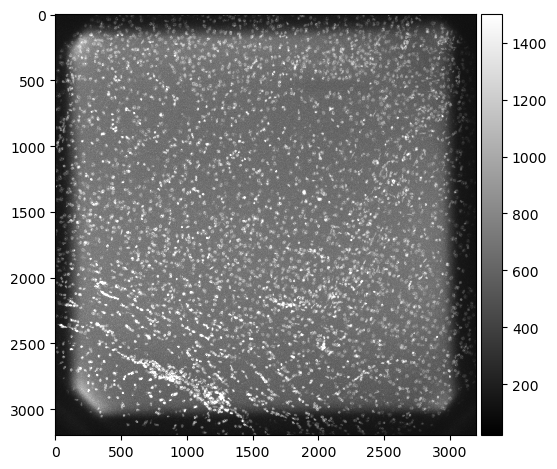

In [2]:
# Image read, write , show tiffs
pth='/mnt/d/allen_data/test_dataset_bc_726126/processed/MAX_Pos1_003_001/'
config_pth=pth # for now, just for testing
I=tfl.imread(pth+'hyb01.tif')
print(I.shape)
print(len(I))
io.imshow(I[4,:,:],cmap='gray',vmin=20,vmax=1500)
tfl.imwrite(pth+'testhyb.tif',I)

In [ ]:
# background removal using rolling ball-skimage-very slow
radius=10
bk=skimage.morphology.ball(radius)
I_filtered=I[:,:,::-1]-skimage.morphology.opening(I[:,:,::-1],footprint=bk)
io.imshow(I_filtered[3,:,:],cmap='gray',vmin=20,vmax=150)
io.imshow(I_filtered[3,:,:],cmap='gray',vmin=20,vmax=150)
tfl.imwrite(pth+'hybbck.tif',I_filtered[:,:,::-1])


(6, 3200, 3200)


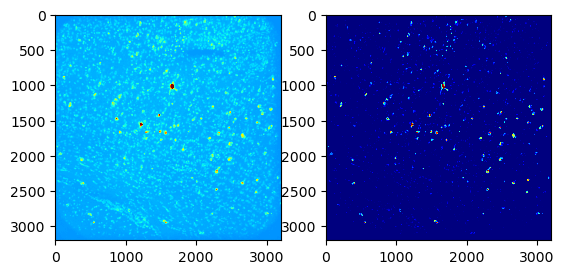

In [6]:
# opencv works much better-removal
radius=10
print(I.shape)
I_filtered=np.zeros(I.shape,I.dtype)
for i in range(len(I)):
    bck=cv2.morphologyEx(I[i,:,:], cv2.MORPH_OPEN, kernel= cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(31,31)))
    #print(bck.dtype)
    I_filtered[i,:,:]=I[i,:,:]-np.expand_dims(bck,0)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(I[1,:,:],cmap='jet',vmin=20,vmax=350)
axes[1].imshow(I_filtered[1,:,:],cmap='jet',vmin=20,vmax=150)
plt.show()
# io.imshow(I_filtered[3,:,:],cmap='gray',vmin=20,vmax=150)
# io.imshow(I_filtered[3,:,:],cmap='gray',vmin=20,vmax=150)
tfl.imwrite(pth+'hybbck.tif',I_filtered)

In [8]:
# load channel shift matrix
chshift=scipy.io.loadmat(config_pth+'chshift20x-20220218.mat')['chshift20x']
print(chshift[2,:])
# chprofile=scipy.io.loadmat(config_pth+'chshift20x-20220218.mat')['chshift20x']
# print(chprofile.shape)

[0. 0.]


4048
(3200, 3200)
<SimilarityTransform(matrix=
    [[ 1., -0.,  0.],
     [ 0.,  1.,  0.],
     [ 0.,  0.,  1.]])>
(6, 3200, 3200)
<SimilarityTransform(matrix=
    [[ 1.  , -0.  , -0.14],
     [ 0.  ,  1.  , -2.8 ],
     [ 0.  ,  0.  ,  1.  ]])>
(6, 3200, 3200)
<SimilarityTransform(matrix=
    [[ 1., -0.,  0.],
     [ 0.,  1.,  0.],
     [ 0.,  0.,  1.]])>
(6, 3200, 3200)
<SimilarityTransform(matrix=
    [[ 1., -0.,  0.],
     [ 0.,  1.,  0.],
     [ 0.,  0.,  1.]])>
(6, 3200, 3200)


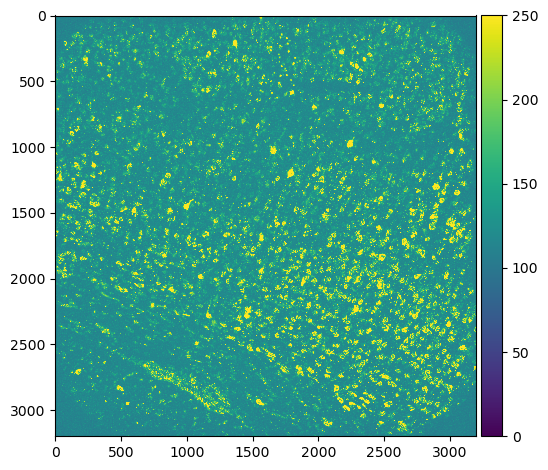

In [10]:
# Channel shifting in one image
I_filtered2=I_filtered[:,:,::-1]
Ishifted=(I_filtered)
print(np.max(I))
print(np.squeeze(I_filtered[i,:,:]).shape)
for i in range(chshift.shape[0]):
    tform=skimage.transform.SimilarityTransform(translation=chshift[i,:])
    print(tform)
    It=skimage.transform.warp(img_as_float(np.squeeze(I[i,:,:])),tform,preserve_range=True,output_shape=(3200,3200))
    Ishifted[i,:,:]=img_as_uint(np.expand_dims(np.clip(It,0,1),0))
    print(Ishifted.shape)
io.imshow( Ishifted[2,:,:],vmin=0,vmax=250)
tfl.imwrite(pth+'hybbck_shifted.tif',Ishifted)
   